# -----------------Seaborn Exercises----------------

## (Seaborn build on top of Matplotlib.pyplot)

Create a file named seaborn_exercises.py or seaborn_exercises.ipynb for this exercise.

Use the iris database to answer the following quesitons:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

# from matplotlib import figure

from pydataset import data

In [124]:
from env import host, user, password

url = f'mysql+pymysql://{user}:{password}@{host}/iris_db'
    
    
iris_database = 'iris_db'

def get_db_url(username, host, password, iris_database):
    
    return f'mysql+pymysql://{user}:{password}@{host}/iris_db'
    


In [21]:
# Get the tables in iris DB as DataFrames

iris_measurements_dataframe = pd.DataFrame(pd.read_sql('Select * from measurements', get_db_url(user,host,password,iris_database)))
# iris_measurements_dataframe

iris_species_dataframe = pd.DataFrame(pd.read_sql('Select * from species', get_db_url(user,host,password,iris_database)))
# iris_species_dataframe


In [23]:
iris_measurements_dataframe

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,3
146,147,6.3,2.5,5.0,1.9,3
147,148,6.5,3.0,5.2,2.0,3
148,149,6.2,3.4,5.4,2.3,3


In [24]:
iris_species_dataframe

,species_id,species_name
0,1,setosa
1,2,versicolor
2,3,virginica


1). What does the distribution of petal lengths look like?



<Figure size 1500x1000 with 0 Axes>

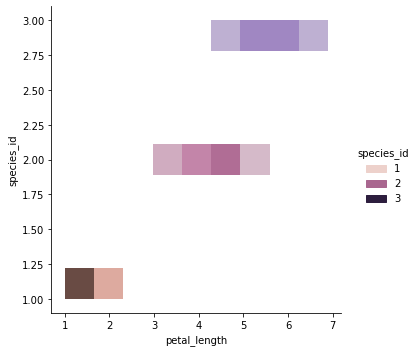

In [195]:
plt.figure(figsize=(15, 10), dpi=100)


sns.displot(data=iris_measurements_dataframe, x='petal_length', y='species_id', hue='species_id')

2). Is there a correlation between petal length and petal width? Use http://guessthecorrelation.com/ as
    a hint to how we could visually determine if a correlation exists between two numeric columns.



In [32]:
iris_measurements_dataframe.corr()

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id
measurement_id,1.000000,0.716676,-0.402301,0.882637,0.900027,0.942830
sepal_length,0.716676,1.000000,-0.117570,0.871754,0.817941,0.782561
sepal_width,-0.402301,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal_length,0.882637,0.871754,-0.428440,1.000000,0.962865,0.949035
petal_width,0.900027,0.817941,-0.366126,0.962865,1.000000,0.956547
species_id,0.942830,0.782561,-0.426658,0.949035,0.956547,1.000000


<Figure size 1500x1000 with 0 Axes>

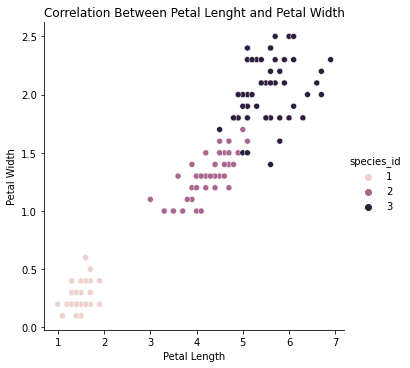

In [194]:
plt.figure(figsize=(15, 10), dpi=100)


sns.relplot(data = iris_measurements_dataframe, x='petal_length', y='petal_width', hue='species_id')
plt.title('Correlation Between Petal Lenght and Petal Width')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')




plt.show()

3). Would it be reasonable to predict species based on sepal width and sepal length? For this, you'll visualize two numeric columns through the lense of a categorical column.



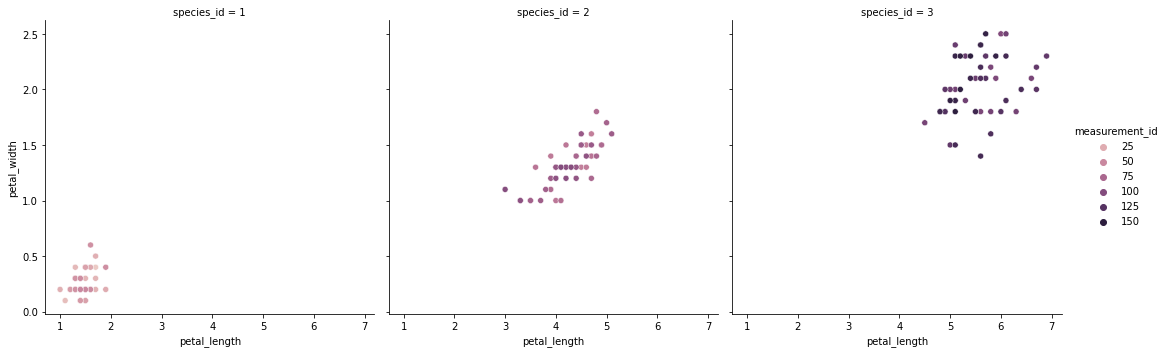

In [54]:
sns.relplot(data = iris_measurements_dataframe, x='petal_length', y='petal_width', col='species_id', hue='measurement_id')

4). Which features would be best used to predict species?

--------------------------------------------------------------------------------------------------------------

1). Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set. Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice?
Plot the x and y values from the anscombe data. Each dataset should be in a separate column.


In [61]:
anscombe_data = sns.load_dataset('anscombe')
anscombe_data.T

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
dataset,I,I,I,I,I,I,I,I,I,I,...,IV,IV,IV,IV,IV,IV,IV,IV,IV,IV
x,10.0,8.0,13.0,9.0,11.0,14.0,6.0,4.0,12.0,7.0,...,8.0,8.0,8.0,8.0,8.0,8.0,19.0,8.0,8.0,8.0
y,8.04,6.95,7.58,8.81,8.33,9.96,7.24,4.26,10.84,4.82,...,5.76,7.71,8.84,8.47,7.04,5.25,12.5,5.56,7.91,6.89


In [136]:
anscombe_data

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [74]:
anscombe_dataframe = pd.DataFrame(anscombe_data)
anscombe_dataframe.groupby(['x','y']).describe()

dataset                 
             count unique  top freq
x    y                             
4.0  3.10        1      1   II    1
     4.26        1      1    I    1
     5.39        1      1  III    1
5.0  4.74        1      1   II    1
     5.68        1      1    I    1
     5.73        1      1  III    1
6.0  6.08        1      1  III    1
     6.13        1      1   II    1
     7.24        1      1    I    1
7.0  4.82        1      1    I    1
     6.42        1      1  III    1
     7.26        1      1   II    1
8.0  5.25        1      1   IV    1
     5.56        1      1   IV    1
     5.76        1      1   IV    1
     6.58        1      1   IV    1
     6.77        1      1  III    1
     6.89        1      1   IV    1
     6.95        1      1    I    1
     7.04        1      1   IV    1
     7.71        1      1   IV    1
     7.91        1      1   IV    1
     8.14        1      1   II    1
     8.47        1      1   IV    1
     8.84        1      1   IV    1
9.0  7.11        1      1  III    1
     8.77        1      1   II    1
     8.81        1      1    I    1
10.0 7.46        1      1  III    1
     8.04        1      1    I    1
     9.14        1      1   II    1
11.0 7.81        1      1  III    1
     8.33        1      1    I    1
     9.26        1      1   II    1
12.0 8.15        1      1  III    1
     9.13        1      1   II    1
     10.84       1      1    I    1
13.0 7.58        1      1    I    1
     8.74        1      1   II    1
     12.74       1      1  III    1
14.0 8.10        1      1   II    1
     8.84        1      1  III    1
     9.96        1      1    I    1
19.0 12.50       1      1   IV    1

In [76]:
anscombe_dataframe.describe()

,x,y
count,44.000000,44.000000
mean,9.000000,7.500682
std,3.198837,1.958925
min,4.000000,3.100000
25%,7.000000,6.117500
50%,8.000000,7.520000
75%,11.000000,8.747500
max,19.000000,12.740000


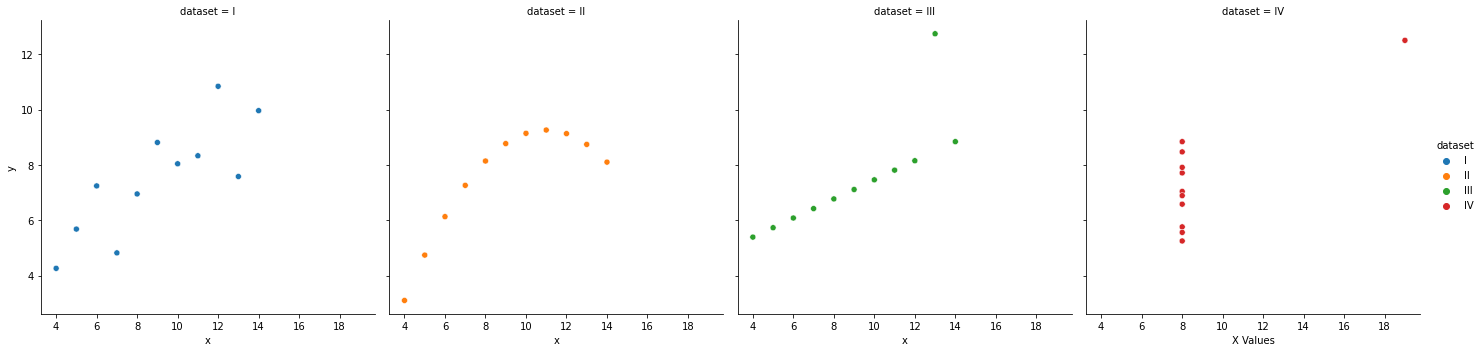

In [137]:
sns.relplot(data = anscombe_dataframe, x='x', y='y', hue='dataset', col='dataset')

#plt.title('Anscombe Data Relations', c='g')
plt.xlabel("X Values")
plt.ylabel('Y Values')


plt.show()


2). Load the InsectSprays dataset and read it's documentation. Create a boxplot that shows the 
effectiveness of the different insect sprays.



In [99]:
insect_sprays = data('InsectSprays')
insect_sprays

,count,spray
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A
6,12,A
7,10,A
8,23,A
9,17,A
10,20,A


<AxesSubplot:xlabel='spray', ylabel='count'>

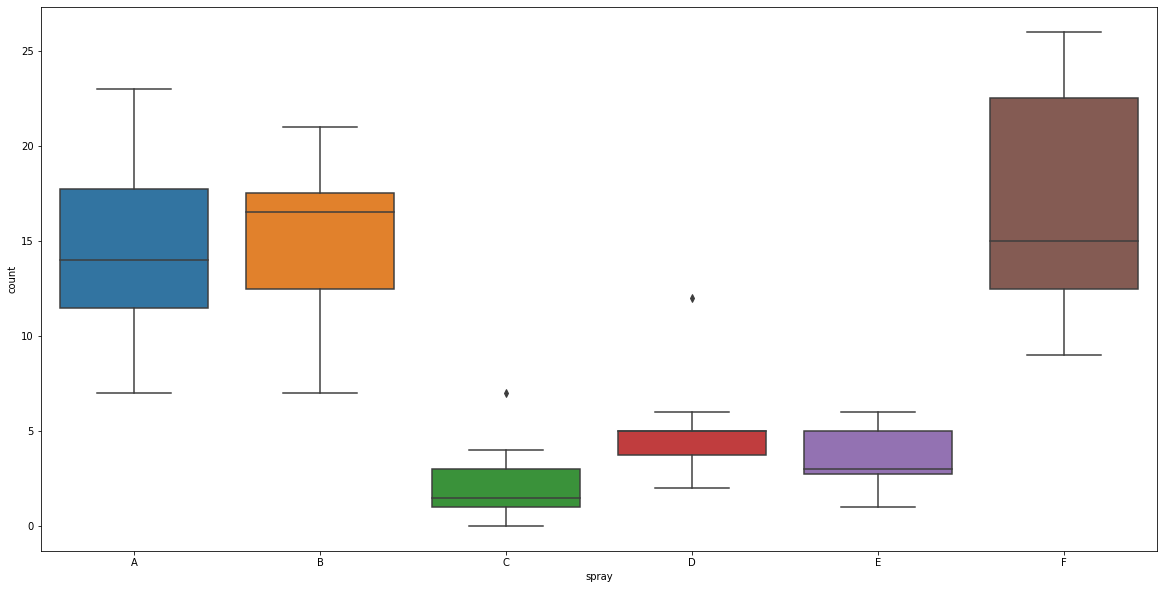

In [193]:
plt.figure(figsize =(20, 10))

sns.boxplot(data=insect_sprays, y ='count', x ='spray')


3). Load the swiss dataset and read it's documentation. The swiss dataset is available from pydatset rather than seaborn. Create visualizations to answer the following questions:

    --> Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)


    --> Does whether or not a province is Catholic influence fertility?


    --> What measure correlates most strongly with fertility?



In [142]:
swiss_data = data('swiss')


swiss_dataframe = pd.DataFrame(swiss_data)

swiss_dataframe

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6
Porrentruy,76.1,35.3,9,7,90.57,26.6
Broye,83.8,70.2,16,7,92.85,23.6
Glane,92.4,67.8,14,8,97.16,24.9
Gruyere,82.4,53.3,12,7,97.67,21.0
Sarine,82.9,45.2,16,13,91.38,24.4


a) --> Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)

In [153]:
# swiss_dataframe['is_catholic'] = np.where(swiss_dataframe.Catholic > 50, 'Catholic', 'Non_catholic')
# swiss_dataframe

swiss_dataframe['is_catholic'] = swiss_dataframe.Catholic > 50
swiss_dataframe

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Courtelary,80.2,17.0,15,12,9.96,22.2,False
Delemont,83.1,45.1,6,9,84.84,22.2,True
Franches-Mnt,92.5,39.7,5,5,93.40,20.2,True
Moutier,85.8,36.5,12,7,33.77,20.3,False
Neuveville,76.9,43.5,17,15,5.16,20.6,False
Porrentruy,76.1,35.3,9,7,90.57,26.6,True
Broye,83.8,70.2,16,7,92.85,23.6,True
Glane,92.4,67.8,14,8,97.16,24.9,True
Gruyere,82.4,53.3,12,7,97.67,21.0,True
Sarine,82.9,45.2,16,13,91.38,24.4,True


b)    --> Does whether or not a province is Catholic influence fertility?



<AxesSubplot:xlabel='is_catholic', ylabel='Fertility'>

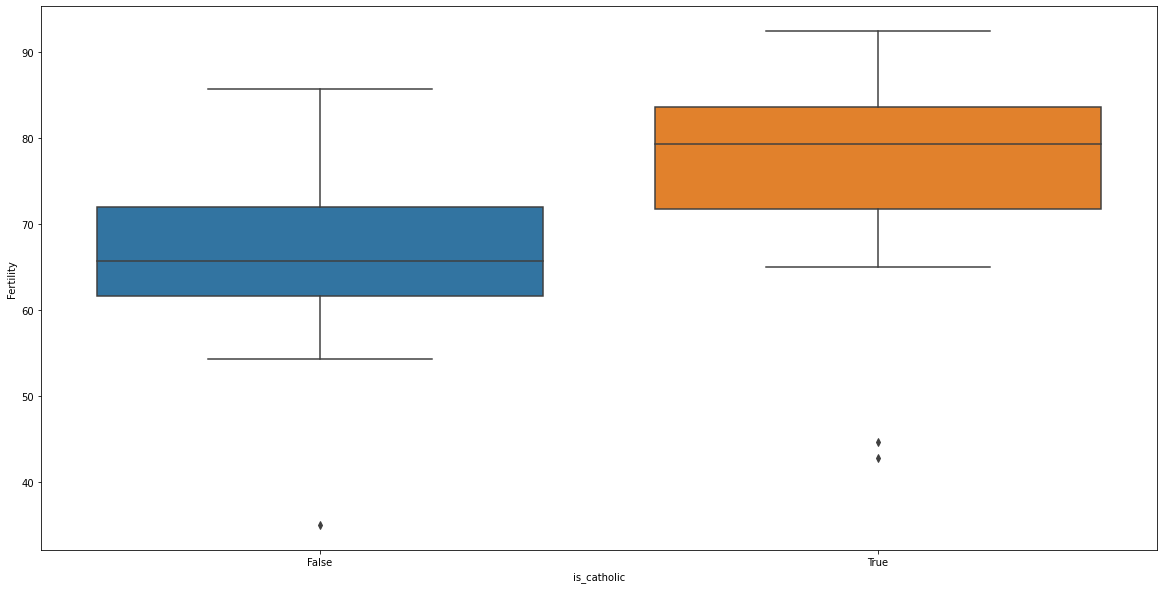

In [192]:
plt.figure(figsize =(20, 10))



sns.boxplot(data=swiss_dataframe, y = 'Fertility', x = 'is_catholic')

c) --> What measure correlates most strongly with fertility?



In [152]:
swiss_dataframe.corr().Fertility

Fertility           1.000000
Agriculture         0.353079
Examination        -0.645883
Education          -0.663789
Catholic            0.463685
Infant.Mortality    0.416556
Name: Fertility, dtype: float64

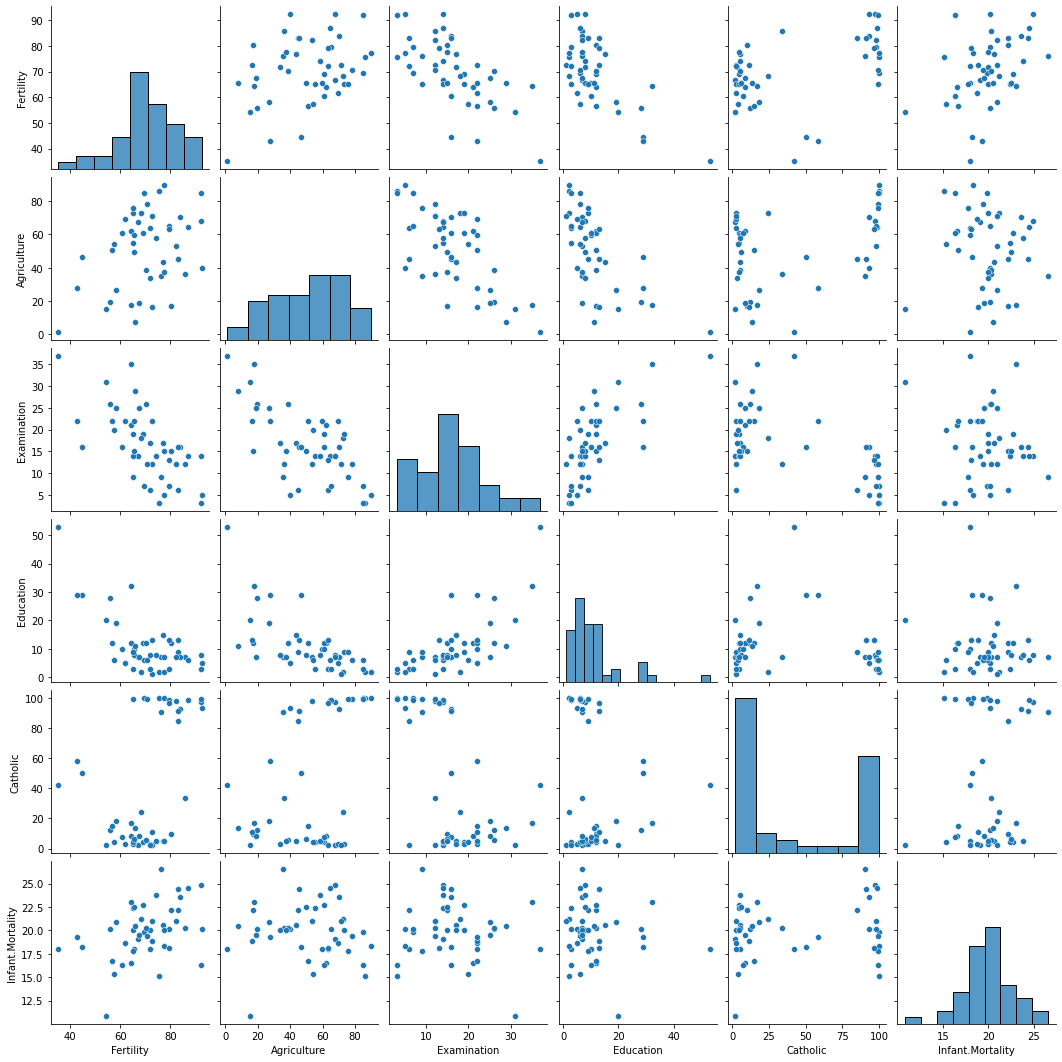

In [148]:
sns.pairplot(swiss_dataframe)



4). Using the chipotle dataset from the previous exercise, create a bar chart that shows the 4 most popular items and the revenue produced by each.

In [155]:
chipotle_database = 'chipotle'

def get_db_url(username, host, password, iris_database):
    
    return f'mysql+pymysql://{user}:{password}@{host}/chipotle'
    
chipotle_dataframe = pd.DataFrame(pd.read_sql('Select * from orders', get_db_url(user,host,password,chipotle_database)))

chipotle_dataframe

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98
...,...,...,...,...,...,...
4617,4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75
4618,4619,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75
4619,4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto Beans, Guacamole, Lettuce]]",$11.25
4620,4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettuce]]",$8.75


In [158]:
chipotle_dataframe['item_price'] = chipotle_dataframe['item_price'].astype('float')
chipotle_dataframe

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,2.39
1,2,1,1,Izze,[Clementine],3.39
2,3,1,1,Nantucket Nectar,[Apple],3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",16.98
...,...,...,...,...,...,...
4617,4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour Cream, Cheese, Lettuce, Guacamole]]",11.75
4618,4619,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese, Lettuce, Guacamole]]",11.75
4619,4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto Beans, Guacamole, Lettuce]]",11.25
4620,4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettuce]]",8.75


In [166]:
# meal_popularity = (pd.crosstab(chipotle_dataframe.quantity, chipotle_dataframe.item_name).max().T)
# meal_popularity.nlargest(4)

popular_meal = chipotle_dataframe.groupby('item_name').quantity.sum().nlargest(4)

popular_meal


item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Steak Burrito          386
Name: quantity, dtype: int64

In [171]:
revenue = chipotle_dataframe[chipotle_dataframe.item_name.isin(popular_meal.index)].groupby('item_name').item_price.sum()
revenue

item_name
Chicken Bowl           7342.73
Chicken Burrito        5575.82
Chips and Guacamole    2201.04
Steak Burrito          3851.43
Name: item_price, dtype: float64

In [172]:
revenue = revenue.sort_values(ascending = False).reset_index()

revenue

,item_name,item_price
0,Chicken Bowl,7342.73
1,Chicken Burrito,5575.82
2,Steak Burrito,3851.43
3,Chips and Guacamole,2201.04


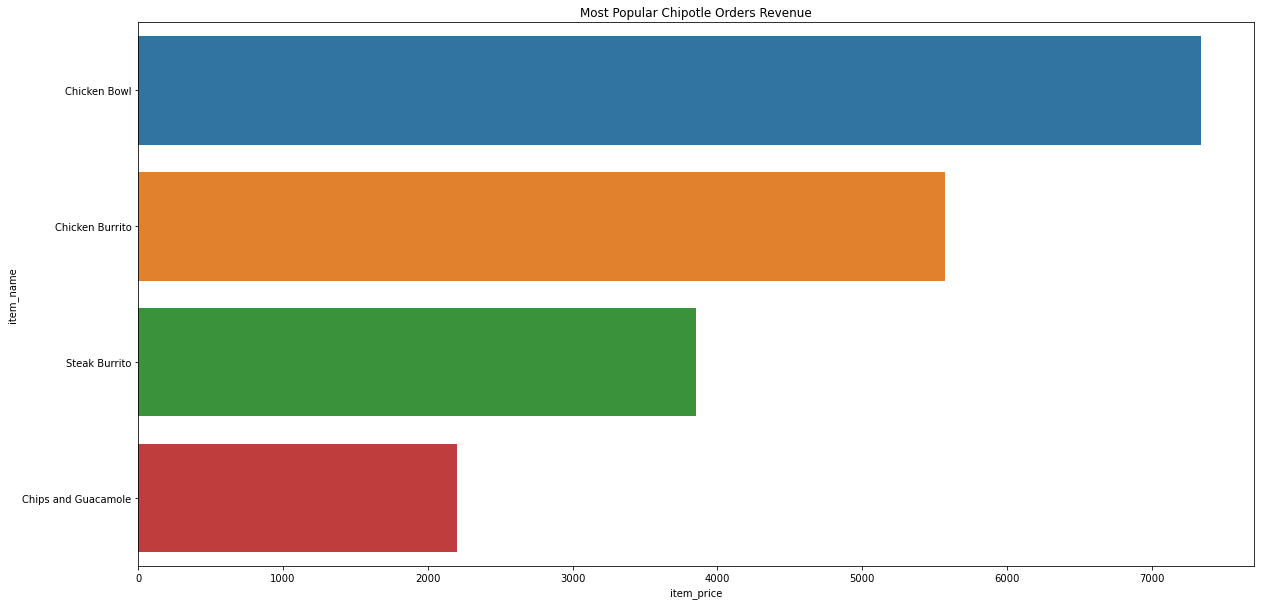

In [191]:
plt.figure(figsize =(20, 10))

sns.barplot(data = revenue, y = 'item_name', x = 'item_price')
plt.title('Most Popular Chipotle Orders Revenue')

plt.show()




5). Load the sleepstudy data and read it's documentation. Use seaborn to create a line chart of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.



In [184]:
sleepstudy = data('sleepstudy')
sleepstudy


,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308
...,...,...,...
176,329.6076,5,372
177,334.4818,6,372
178,343.2199,7,372
179,369.1417,8,372


In [185]:
# Append Subject and convert to string

sleepstudy['Subject'] = 'Subject_'+ sleepstudy.Subject.astype(str)

In [182]:
sleepstudy.head()

,Reaction,Days,Subject
1,249.5600,0,Subject_308
2,258.7047,1,Subject_308
3,250.8006,2,Subject_308
4,321.4398,3,Subject_308
5,356.8519,4,Subject_308


Text(0, 265, 'Average')

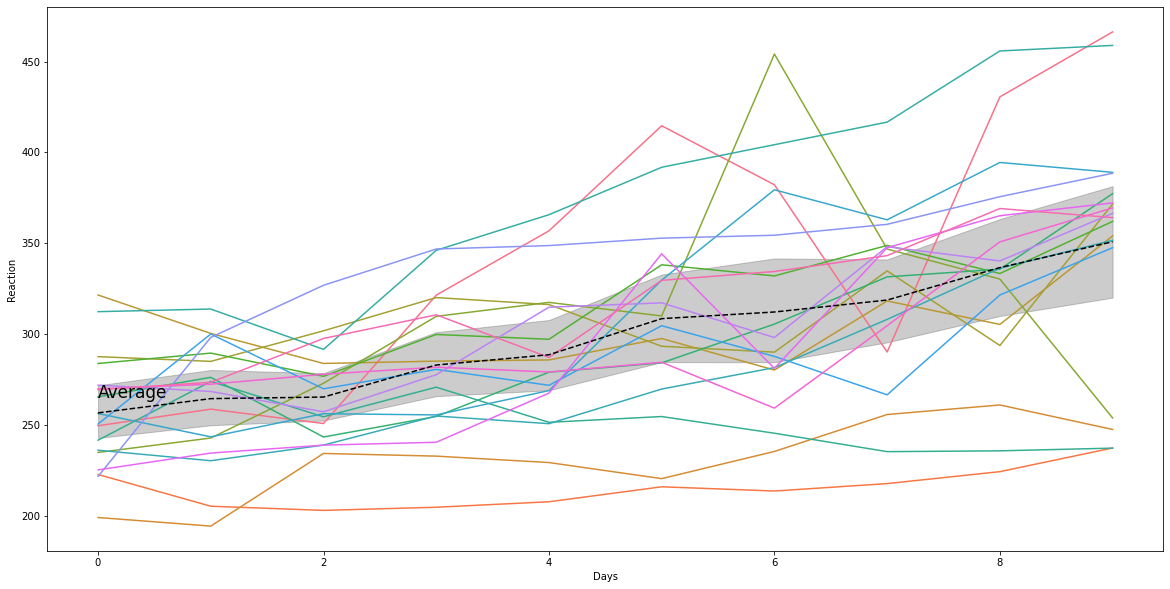

In [197]:
# ------ With Instructor Guide


plt.figure(figsize =(20, 10))


sns.lineplot(data = sleepstudy, x = 'Days', y = 'Reaction', hue = 'Subject', legend= False)
sns.lineplot(data = sleepstudy, x = 'Days', y = 'Reaction', color = 'black', linestyle='--', estimator = 'mean')
plt.annotate('Average',(0,265),fontsize=17)